# LSTM Train - Trafik - No PCA

In [1]:
import pandas as pd
import sys
from pathlib import Path
sys.path.append('../..')
from src import config
from src.utils.dataset import TrafficDataset
from src.utils.model import TrafficPredictor
from torch.utils.data import DataLoader, random_split

In [2]:
DATASET_PATH = config.DATA_TRAFIK
df = pd.read_parquet(DATASET_PATH)
df = df.fillna(0)
X_STEP, Y_STEP = 2, 1
data_array = df.values

Epoch 1/10  Train Loss: 85321.0914  Val Loss: 83097.7763  Val MSE: 83516.1328  Val R2: -1.5115
Epoch 2/10  Train Loss: 82531.5093  Val Loss: 80655.5241  Val MSE: 81064.1641  Val R2: -1.4378
Epoch 3/10  Train Loss: 80247.2422  Val Loss: 78346.9698  Val MSE: 78746.1953  Val R2: -1.3681
Epoch 4/10  Train Loss: 77980.6358  Val Loss: 76132.5831  Val MSE: 76522.5781  Val R2: -1.3012
Epoch 5/10  Train Loss: 75743.1830  Val Loss: 74002.3501  Val MSE: 74383.2344  Val R2: -1.2369
Epoch 6/10  Train Loss: 73704.2488  Val Loss: 71947.2926  Val MSE: 72319.1875  Val R2: -1.1748
Epoch 7/10  Train Loss: 71587.9333  Val Loss: 69961.5439  Val MSE: 70324.5547  Val R2: -1.1148
Epoch 8/10  Train Loss: 69708.8358  Val Loss: 68046.9854  Val MSE: 68401.2266  Val R2: -1.0570
Epoch 9/10  Train Loss: 67740.1701  Val Loss: 66193.3972  Val MSE: 66538.9453  Val R2: -1.0010
  >> Model saved to /home/orhankocak_0233/MLProject_570/models/lstm_trafik_nopca.pt (val_loss improved)
Epoch 10/10  Train Loss: 65796.4134  Val 

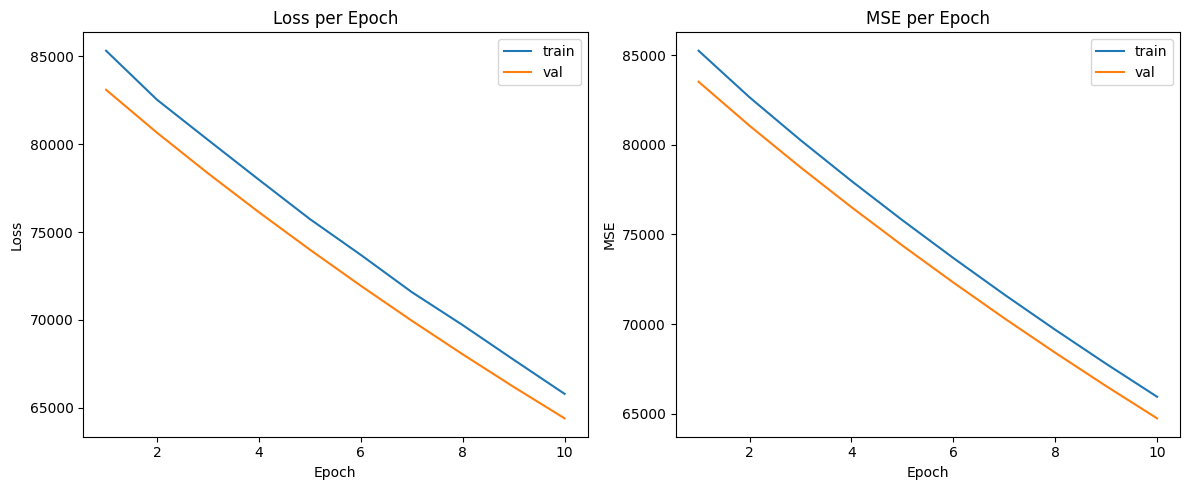

== Final Metrics ==
mse: 64740.35546875
mae: 188.86859130859375
r2: -0.946875810623169


In [ ]:
# PCA kullanılmıyor
dataset = TrafficDataset(data_array, X_STEP, Y_STEP)
train_len = int(len(dataset) * 0.8)
val_len = len(dataset) - train_len
train_ds, val_ds = random_split(dataset, [train_len, val_len])
train_loader = DataLoader(train_ds, batch_size=100, shuffle=True, num_workers=8)
val_loader = DataLoader(val_ds, batch_size=100, num_workers=8)
predictor = TrafficPredictor('lstm', dataset.sensors, X_STEP, Y_STEP, pca_model=dataset.pca if False else None)
predictor.train(train_loader, val_loader, epochs=100, save_path=config.PROJECT_ROOT.joinpath('models/lstm_trafik_nopca.pt'), save_optimizer=True)
predictor.show()